# Example of asset price chart (10% annual return)

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.ticker as mtick

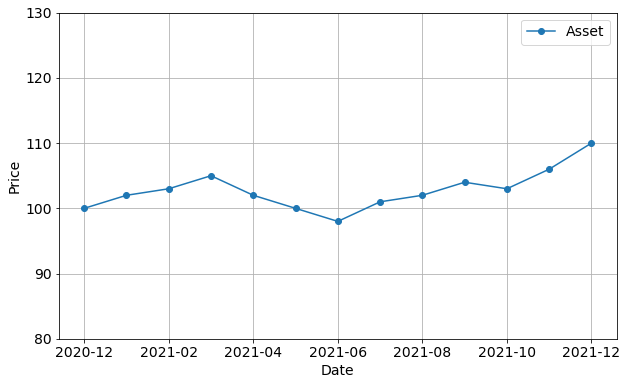

In [2]:
asset_example = pd.DataFrame(
    data = {'Asset': [100,
                      102, 103, 105,
                      102, 100, 98,
                      101, 102, 104,
                      103, 106, 110]},
    index = ['2020-12',
             '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09',
             '2021-10', '2021-11','2021-12']
)

plot = asset_example.plot(
    ylim=[80,130],
    figsize = (10,6),
    fontsize = 14,
    grid = True,
    marker='o'
)

plot.set_ylabel('Price', fontsize = 14)
plot.set_xlabel('Date', fontsize = 14)
plot.legend(fontsize = 14)

# Example of volatility risk

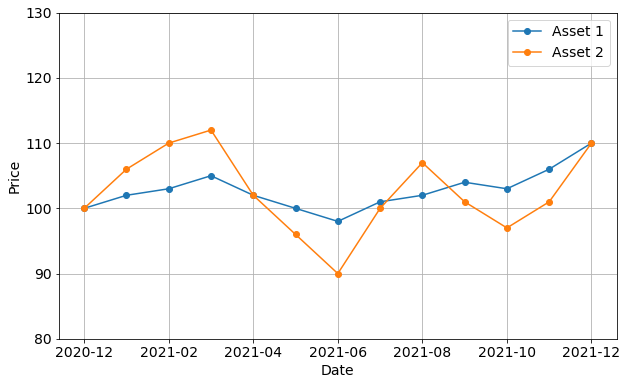

In [3]:
risk_example = pd.DataFrame(
    data = {
        'Asset 1': [100,
                    102, 103, 105,
                    102, 100, 98,
                    101, 102, 104,
                    103, 106, 110],
        'Asset 2': [100,
                    106, 110, 112,
                    102, 96, 90,
                    100, 107, 101,
                    97, 101, 110]
    },
    index = ['2020-12',
             '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09',
             '2021-10', '2021-11','2021-12']
)

plot = risk_example.plot(
    ylim=[80,130],
    figsize = (10,6),
    fontsize = 14,
    grid = True,
    marker='o'
)

plot.set_ylabel('Price', fontsize = 14)
plot.set_xlabel('Date', fontsize = 14)
plot.legend(fontsize = 14)

# Annual return distribution of different asset classes for the last 15 years

In [4]:
stock = yf.Ticker("VTI").history(start="2006-01-01", end="2022-01-01", interval="1mo")
bond = yf.Ticker("BND").history(start="2006-01-01", end="2022-01-01", interval="1mo")
gold = yf.Ticker("GLD").history(start="2006-01-01", end="2022-01-01", interval="1mo")
reit = yf.Ticker("VNQ").history(start="2006-01-01", end="2022-01-01", interval="1mo")

In [5]:
stock = stock[stock['Close'].notna()]
bond = bond[bond['Close'].notna()]
gold = gold[gold['Close'].notna()]
reit = reit[reit['Close'].notna()]

stock = stock[stock.index.month == 12]
bond = bond[bond.index.month == 12]
gold = gold[gold.index.month == 12]
reit = reit[reit.index.month == 12]

stock['Return'] = stock['Close']
stock['Return'] = stock['Return'].shift(1)
stock['Return'] = (stock['Close']/stock['Return']) - 1

bond['Return'] = bond['Close']
bond['Return'] = bond['Return'].shift(1)
bond['Return'] = (bond['Close']/bond['Return']) - 1

gold['Return'] = gold['Close']
gold['Return'] = gold['Return'].shift(1)
gold['Return'] = (gold['Close']/gold['Return']) - 1

reit['Return'] = reit['Close']
reit['Return'] = reit['Return'].shift(1)
reit['Return'] = (reit['Close']/reit['Return']) - 1

df = pd.DataFrame(
    data = {
        'Cash': pd.Series(0),
        'Bond': pd.Series(bond['Return'].tolist()),
        'Stock': pd.Series(stock['Return'].tolist()),
        'Gold': pd.Series(gold['Return'].tolist()),
        'REIT': pd.Series(reit['Return'].tolist()),
    }
)
df['Cash'] = 0

,Cash,Bond,Stock,Gold,REIT
count,16.0,14.000000,15.000000,15.000000,15.000000
mean,0.0,0.038170,0.123417,0.080718,0.093916
std,0.0,0.036199,0.180113,0.161444,0.211193
min,0.0,-0.024196,-0.371288,-0.283298,-0.376371
25%,0.0,0.011889,0.031374,-0.020642,-0.015779
50%,0.0,0.038821,0.162535,0.080327,0.078267
75%,0.0,0.065788,0.235588,0.209424,0.288522
max,0.0,0.088994,0.337322,0.304540,0.414695


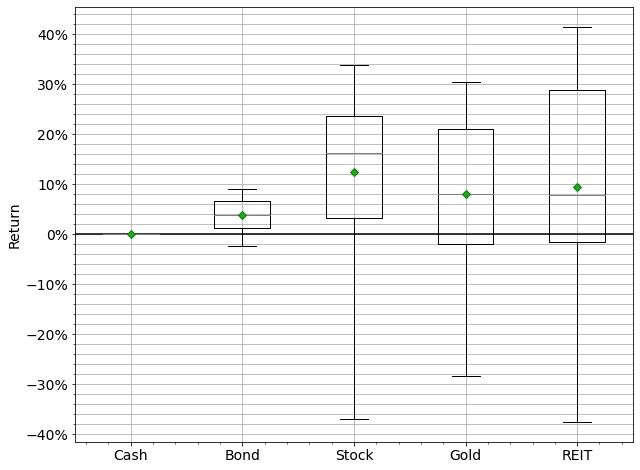

In [6]:
w = 1
boxprops = dict(color='k', linewidth=w)
medianprops= dict(color='tab:gray', linewidth=w, linestyle='-')
whiskerprops=dict(color='k', linewidth=w)
capprops=dict(color='k', linewidth=w)
meanprops = dict(marker='D', markeredgecolor='g')

boxplot = df.boxplot(
    whis=99, 
    showmeans=True,
    figsize=(10,8), 
    fontsize=14,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    meanprops=meanprops,
)

boxplot.yaxis.set_major_formatter(mtick.PercentFormatter(1))
boxplot.set_ylabel('Return', fontsize=14)
boxplot.minorticks_on()
boxplot.grid(which = "minor", axis="y")
boxplot.axhline(0, color='black')

df.describe()

# Relationship between return distribution and stock & cash ratio

,Stock 0%,Stock 50%,Stock 80%,Stock 100%
count,16.0,15.000000,15.000000,15.000000
mean,0.0,0.061708,0.098733,0.123417
std,0.0,0.090056,0.144090,0.180113
min,0.0,-0.185644,-0.297031,-0.371288
25%,0.0,0.015687,0.025099,0.031374
50%,0.0,0.081267,0.130028,0.162535
75%,0.0,0.117794,0.188470,0.235588
max,0.0,0.168661,0.269858,0.337322


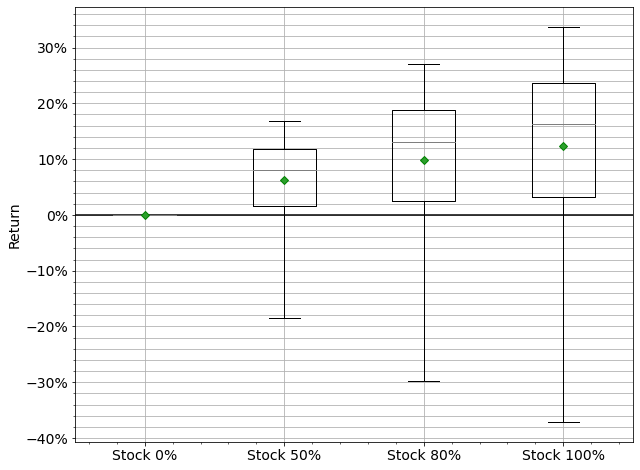

In [7]:
portfolio = pd.DataFrame(columns=['Stock 0%','Stock 50%','Stock 80%','Stock 100%'])
portfolio['Stock 100%'] = stock['Return']
portfolio['Stock 80%'] = (stock['Return'])*80/100
portfolio['Stock 50%'] = (stock['Return'])*50/100
portfolio['Stock 0%'] = 0

boxplot = portfolio.boxplot(
    whis=99, 
    showmeans=True,
    figsize=(10,8), 
    fontsize=14,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    meanprops=meanprops,
)

boxplot.yaxis.set_major_formatter(mtick.PercentFormatter(1))
boxplot.set_ylabel('Return', fontsize=14)
boxplot.minorticks_on()
boxplot.grid(which = "minor", axis="y")
boxplot.axhline(0, color='black')

portfolio.describe()

# Comprison between stock & cash and gold portfolio when the average return is equal

,Stock & Cash,Gold
count,15.000000,15.000000
mean,0.080718,0.080718
std,0.117798,0.161444
min,-0.242832,-0.283298
25%,0.020519,-0.020642
50%,0.106302,0.080327
75%,0.154080,0.209424
max,0.220617,0.304540


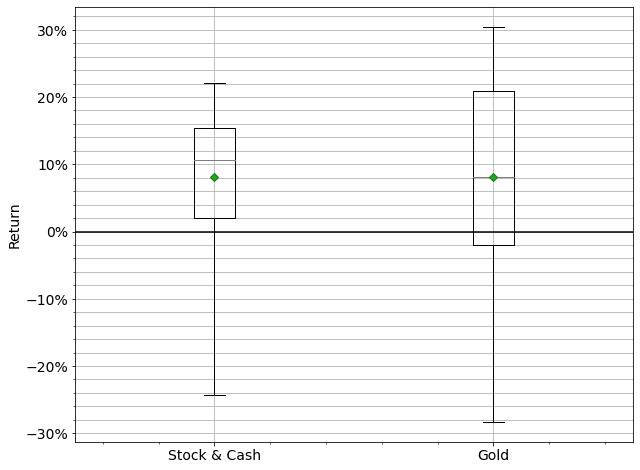

In [8]:
stockgold = pd.DataFrame(
    data = {
        'Stock & Cash': pd.Series(stock['Return'] * gold['Return'].mean() / stock['Return'].mean()),
        'Gold': pd.Series(gold['Return'])
    }
)

boxplot = stockgold.boxplot(
    whis=99, 
    showmeans=True,
    figsize=(10,8), 
    fontsize=14,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    meanprops=meanprops,
)

boxplot.yaxis.set_major_formatter(mtick.PercentFormatter(1))
boxplot.set_ylabel('Return', fontsize=14)
boxplot.minorticks_on()
boxplot.grid(which = "minor", axis="y")
boxplot.axhline(0, color='black')

stockgold.describe()

# Range of annual returns on S&P500 for various time periods

In [9]:
#url = 'https://www.macrotrends.net/2324/sp-500-historical-chart-data'
#url = 'https://info.finance.yahoo.co.jp/ranking/?kd=4'
url = 'https://www.macrotrends.net/2526/sp-500-historical-annual-returns'
dfs = pd.read_html(url)

In [10]:
sp500 = dfs[0]['S&P 500 Index - Historical Annual Data']
sp500 = sp500[sp500.Year >= 1970]
sp500.sort_values(by='Year', inplace=True, ascending=True)

period = {'1 year':1, '5 years':5, '10 years':10, '15 years':15, '20 years':20, '25 years':25}

# Invest the same amount of money at every year
for key in period:
    years = period[key]
    sp500[key] = 0
    for i in range(1, years+1):
        #print(i)
        sp500[key] += (1/sp500['Year Open']).shift(i)
    sp500[key] = (sp500[key] * sp500['Year Open']/years) ** (1/years) - 1


Coverage period: 1970 - 2022
Negative return ratio in 1 year: 25.0%
Negative return ratio in 5 years: 15.0%
Negative return ratio in 10 years: 5.0%
Negative return ratio in 15 years: 0.0%
Negative return ratio in 20 years: 0.0%
Negative return ratio in 25 years: 0.0%


,1 year,5 years,10 years,15 years,20 years,25 years
count,52.000000,48.000000,43.000000,38.000000,33.000000,28.000000
mean,0.091794,0.049850,0.049577,0.049686,0.049920,0.050486
std,0.162551,0.048363,0.029242,0.023335,0.019729,0.016329
min,-0.356118,-0.067520,-0.026955,0.001590,0.017981,0.029527
25%,-0.000340,0.023198,0.028793,0.037872,0.032494,0.035923
50%,0.119151,0.053083,0.048874,0.050286,0.049428,0.049893
75%,0.199466,0.078156,0.067779,0.065493,0.059700,0.058967
max,0.352029,0.153661,0.110902,0.098328,0.092305,0.086256


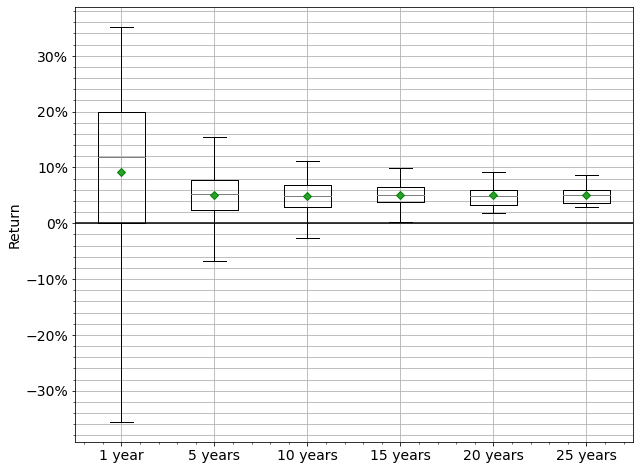

In [11]:
columns = ['1 year', '5 years', '10 years', '15 years', '20 years', '25 years']

boxplot = sp500[columns].boxplot(
    whis=99, 
    showmeans=True,
    figsize=(10,8), 
    fontsize=14,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    meanprops=meanprops,
)

boxplot.yaxis.set_major_formatter(mtick.PercentFormatter(1))
boxplot.set_ylabel('Return', fontsize=14)
boxplot.minorticks_on()
boxplot.grid(which = "minor", axis="y")
boxplot.axhline(0, color='black')

negative_return = dict()
for i in columns:
        negative_return[i] = sp500[sp500[i] < 0].count()[i] / sp500[i].count()

print("Coverage period: " + str(sp500['Year'].min()) + " - " + str(sp500['Year'].max()))
for key in negative_return:
    print("Negative return ratio in " + key + ": " + str((negative_return[key]*100).round()) + "%")

sp500[columns].describe()